# Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1) Which variables are significant in predicting the price of a house, and

2) How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.

# Steps of assignment
1) Importing dataframe <br/>
2) Data understanding and cleaning <br/> 
3) EDA Analysis <br/>
4) Scalling and Train test split <br/>
5) Model building (Linear regression, Lasso and ridge regresssion) <br/>
6) Model evalution <br/>
7) Conclusion

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importoing dataframe

data=pd.read_csv('train.csv')

In [3]:
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
data.shape

(1460, 81)

# 2) Data understanding and cleaning

In [7]:
# Checking null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [187]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.head(20)

Null %
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
Id              0.00

In [8]:
# Keeping threshold of 15% we can drop 6 features
data = data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu', 'LotFrontage'],axis=1)


In [9]:
for col in ('GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 
           'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical'):
    
    data[col] = data[col].fillna(data[col].mode()[0])

In [10]:
# Also we can drop ID coloum
data = data.drop(['Id'],axis=1)

In [11]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.head()

Null %
MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0

In [12]:
data.shape

(1460, 74)

In [13]:
# Outlier Checking
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])


MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
90%     120.000000   14381.700000     8.000000     7.000000  2006.000000   
95%     160.000000   17401.150000     8.000000     8.000000  2007.000000   
99%     190.000000   37567.640000    10.000000     9.000000  2009.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
90%     2006.000000   335.000000  1065.500000   117.200000  1232.000000  ...   
95%     2007.000000   456.000000  1274.000000   396.200000  1468.000000  ...   
99%     2009.000000   791.280000  1572.410000   830.380000  1797.050000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 36 columns]

In [14]:
# Droping insignificant coloums  
data = data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [15]:
data.shape

(1460, 71)

In [89]:
# Checking correlation
cor = data.corr()
cor

MSSubClass   LotArea  OverallQual  OverallCond  \
MSSubClass               1.000000 -0.369139     0.090250    -0.073196   
LotArea                 -0.369139  1.000000     0.163580    -0.025387   
OverallQual              0.090250  0.163580     1.000000    -0.136628   
OverallCond             -0.073196 -0.025387    -0.136628     1.000000   
YearBuilt                0.122333  0.052769     0.598878    -0.409218   
YearRemodAdd             0.083417  0.024566     0.550306     0.042714   
MasVnrArea               0.055136  0.132089     0.414868    -0.138365   
BsmtFinSF1              -0.051918  0.182243     0.201277    -0.039500   
BsmtFinSF2              -0.059137  0.053369    -0.108441     0.045061   
BsmtUnfSF               -0.159040  0.072360     0.343764    -0.149687   
TotalBsmtSF             -0.251030  0.293578     0.557398    -0.191758   
1stFlrSF                -0.295211  0.386628     0.503898    -0.138048   
2ndFlrSF                 0.311346  0.086122     0.288246     0.007163   
LowQualFinSF                  NaN       NaN          NaN          NaN   
GrLivArea                0.049305  0.372503     0.641246    -0.099452   
BsmtFullBath             0.025964  0.092714     0.097738    -0.043492   
BsmtHalfBath            -0.006585  0.044049    -0.060448     0.136612   
FullBath                 0.100469  0.166304     0.618941    -0.215576   
HalfBath                 0.227527  0.077495     0.257481    -0.072232   
BedroomAbvGr            -0.119415  0.283987     0.144447     0.019791   
KitchenAbvGr                  NaN       NaN          NaN          NaN   
TotRmsAbvGrd            -0.040026  0.350870     0.519693    -0.058219   
Fireplaces              -0.004638  0.293483     0.381054    -0.050404   
GarageYrBlt              0.119918 -0.025102     0.465263    -0.331557   
GarageCars               0.001464  0.286941     0.631924    -0.210931   
GarageArea              -0.070890  0.321867     0.571214    -0.176561   
WoodDeckSF               0.016460  0.167492     0.226746    -0.031882   
OpenPorchSF              0.013166  0.155997     0.319504    -0.065578   
EnclosedPorch           -0.037894 -0.012292    -0.120773     0.090154   
ScreenPorch             -0.021424  0.091875     0.038642     0.042322   
MoSold                  -0.018984 -0.004166     0.084948     0.003930   
YrSold                  -0.018556 -0.022379    -0.004686     0.044184   
MSZoning_FV              0.183792 -0.154152     0.173493    -0.111602   
MSZoning_RH              0.008804 -0.057367    -0.064551    -0.034103   
MSZoning_RL             -0.336723  0.407424     0.133451    -0.061266   
MSZoning_RM              0.279245 -0.362814    -0.213814     0.158380   
Street_Pave              0.005890 -0.099313     0.060722     0.055463   
LotShape_IR2            -0.009280  0.164875     0.061939    -0.037574   
LotShape_IR3            -0.024398  0.132320     0.013473    -0.059618   
LotShape_Reg             0.104296 -0.277031    -0.176543     0.022584   
LandContour_HLS         -0.018660  0.083652     0.110925    -0.008392   
LandContour_Low         -0.009485  0.193229    -0.074683    -0.036557   
LandContour_Lvl          0.024800 -0.124494     0.028848    -0.019847   
Utilities_NoSeWa        -0.023109  0.030750    -0.002836     0.010179   
LotConfig_CulDSac       -0.028355  0.193222     0.057503     0.014779   
LotConfig_FR2            0.024485  0.032363     0.017458    -0.021376   
LotConfig_FR3            0.052823 -0.013475     0.044959     0.007886   
LotConfig_Inside         0.076941 -0.186407    -0.039126    -0.043846   
LandSlope_Mod           -0.014519  0.121405    -0.051945     0.015585   
LandSlope_Sev           -0.014732  0.144762    -0.068835    -0.029743   
Neighborhood_Blueste     0.102511 -0.075758    -0.004012     0.014401   
Neighborhood_BrDale      0.291482 -0.210731    -0.036843    -0.015534   
Neighborhood_BrkSide    -0.033539 -0.118942    -0.169083     0.104557   
Neighborhood_ClearCr     0.021569  0.171476    -0.026466    -0.018749   
Neighbor

# 3) EDA Analysis 

In [17]:
# Numeric columns

data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
#Categorical columns

data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

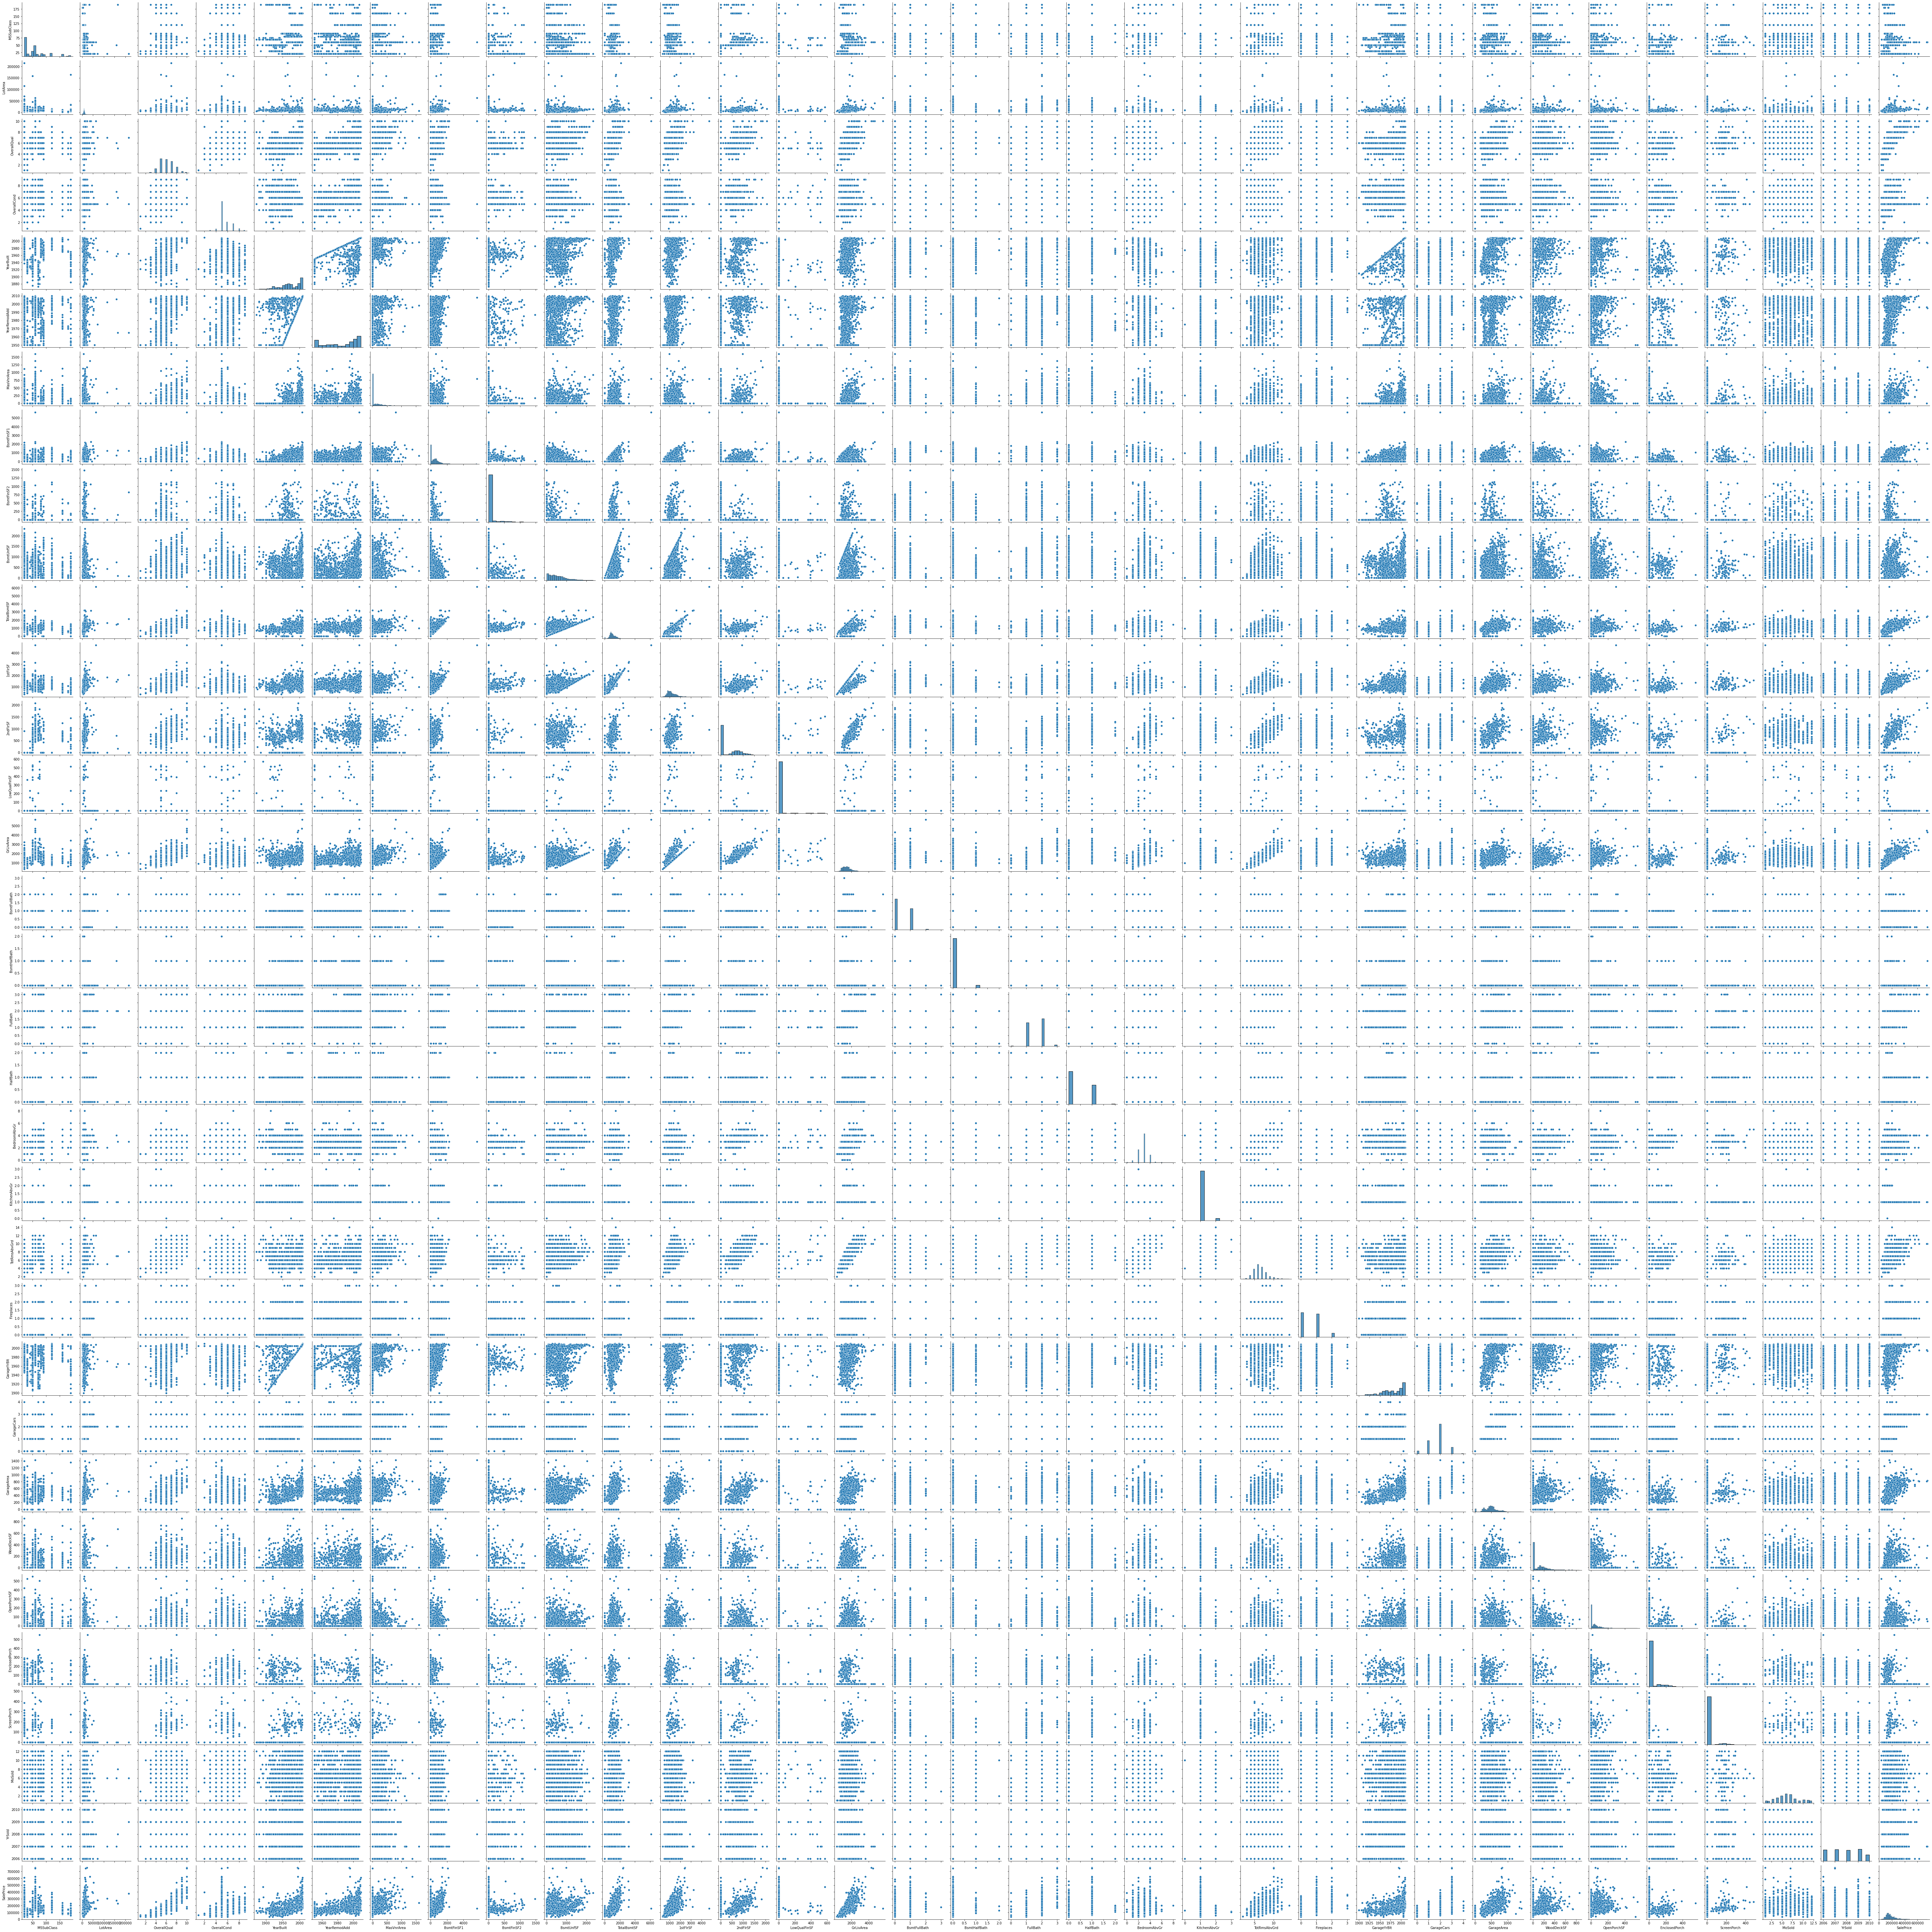

In [19]:
# To see pair plot of numerical variables

sns.pairplot(data, vars=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] )
plt.show()

Here we can see which variables have linear relationship with the target variable

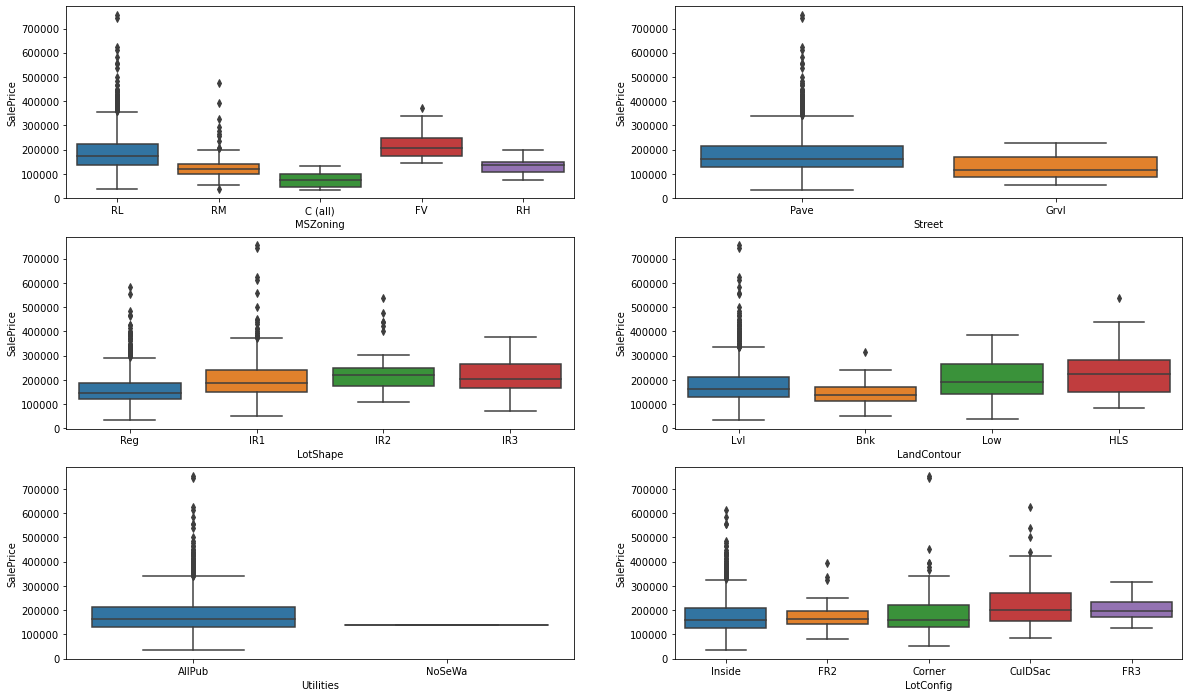

In [20]:
# Let's see Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = data)

plt.show()


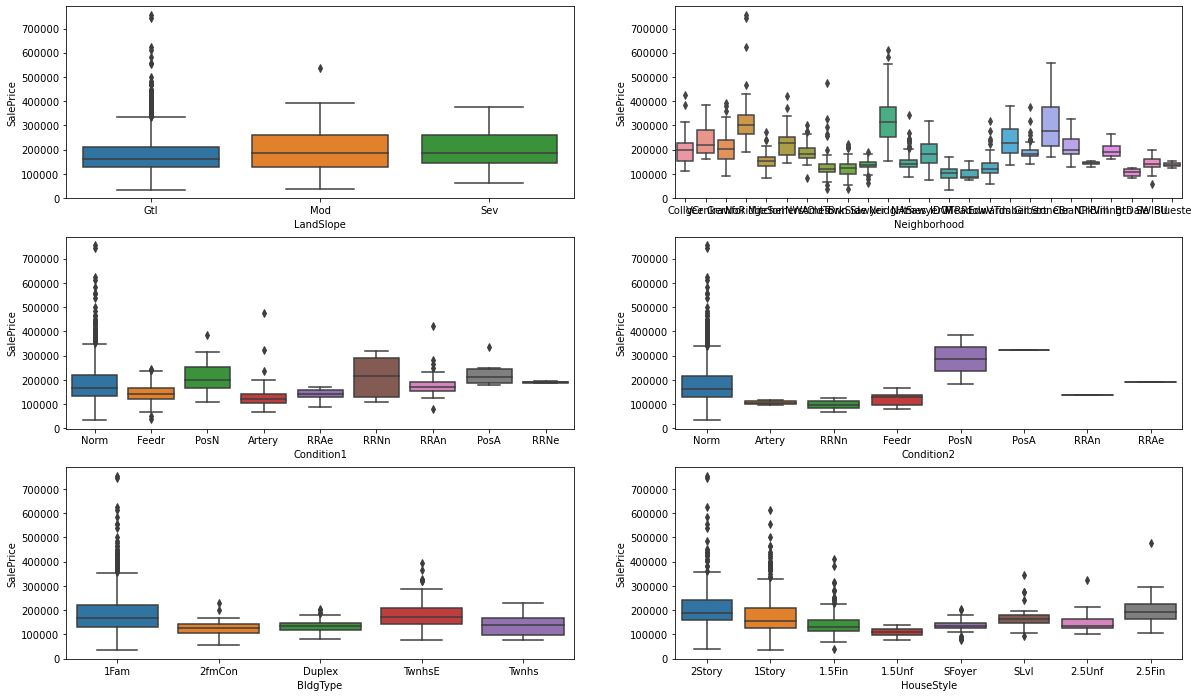

In [21]:


plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data)

plt.show()


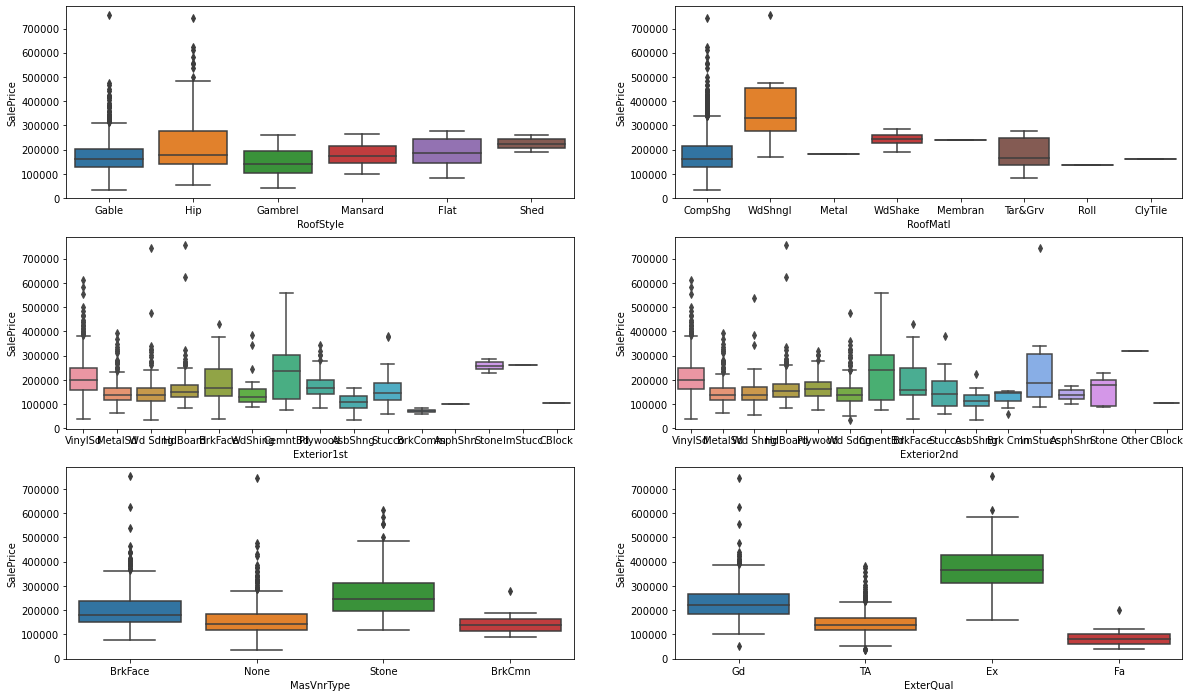

In [22]:
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = data)

plt.show()

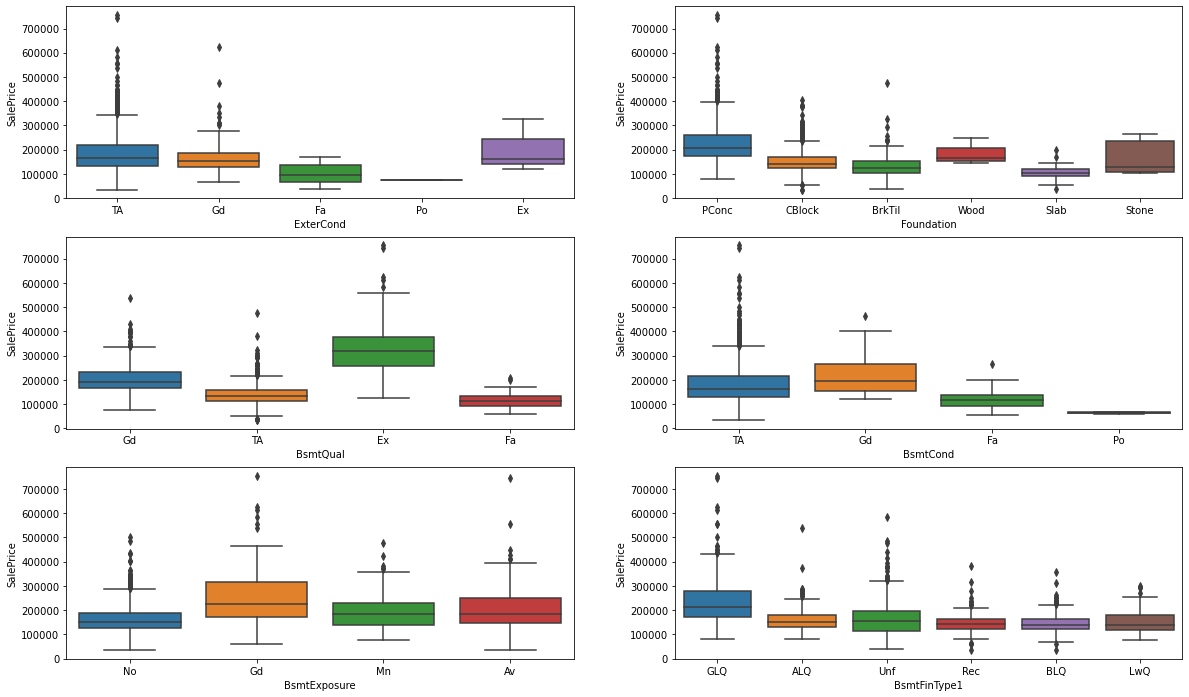

In [23]:
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = data)

plt.show()

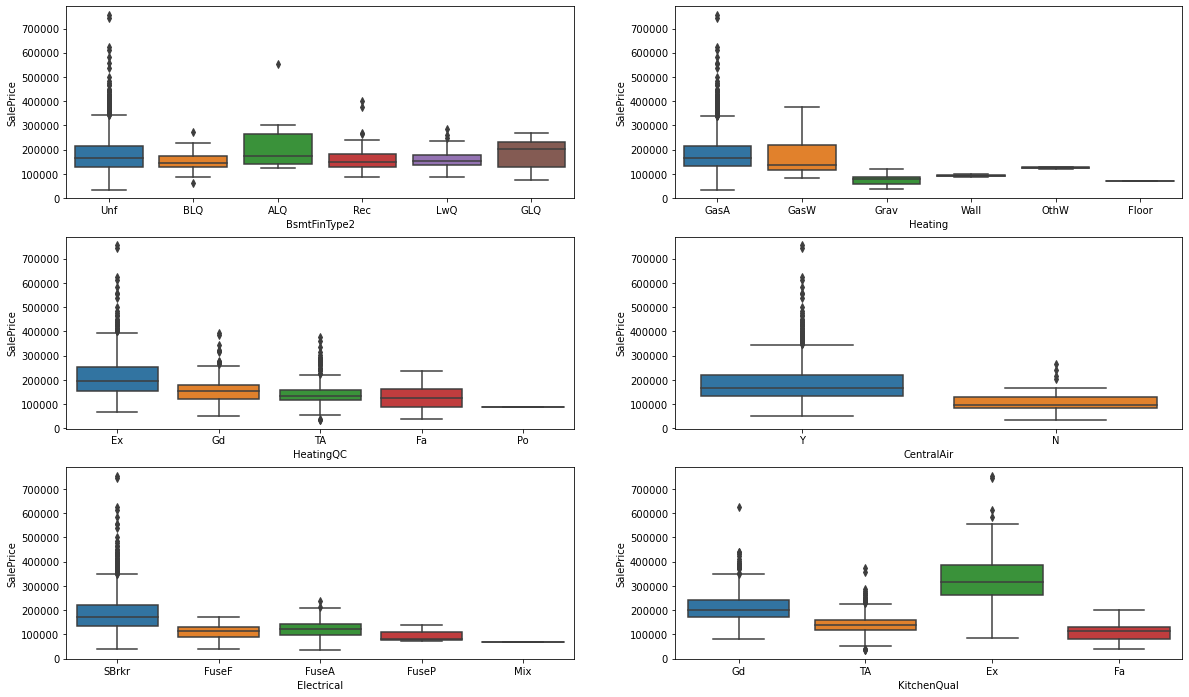

In [24]:
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = data)

plt.show()

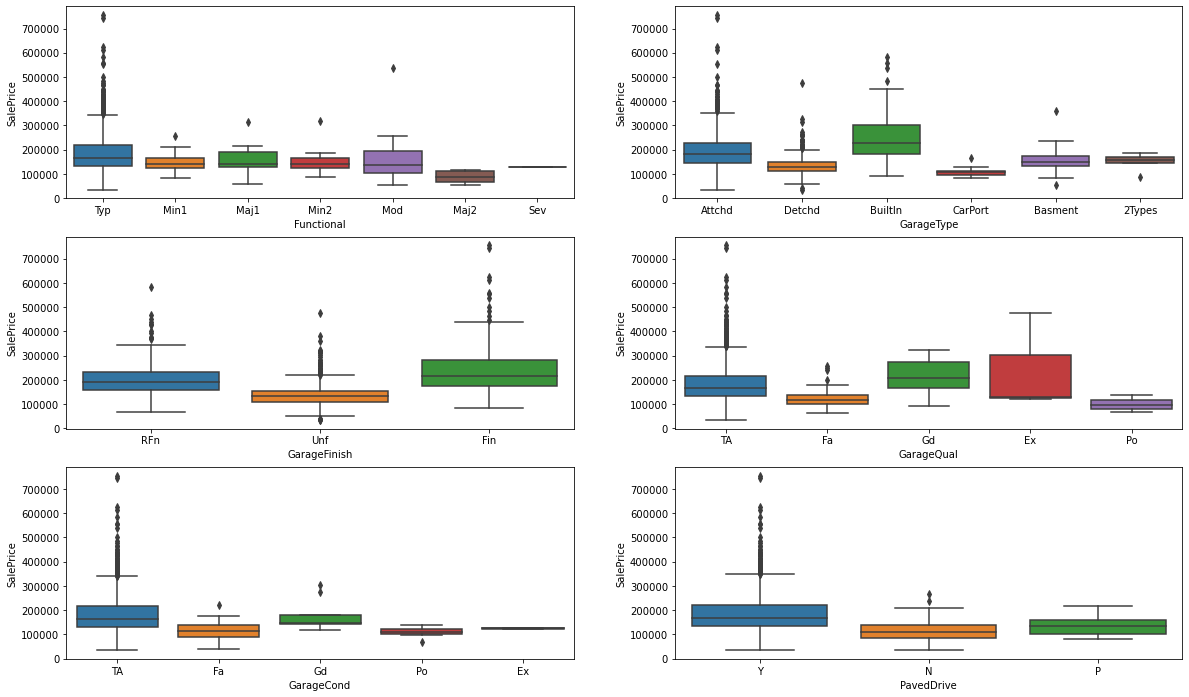

In [25]:
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = data)
plt.subplot(3,2,6)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = data)

plt.show()

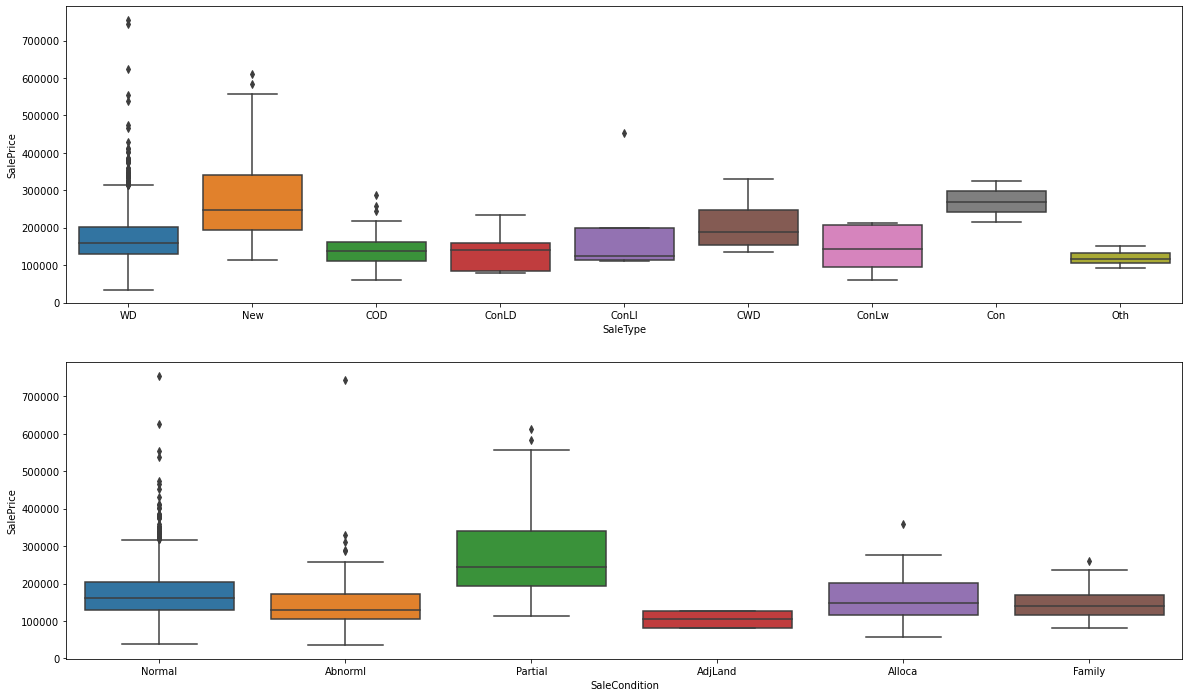

In [26]:
plt.figure(figsize=(20, 12))

plt.subplot(2,1,1)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = data)
plt.subplot(2,1,2)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = data)

plt.show()

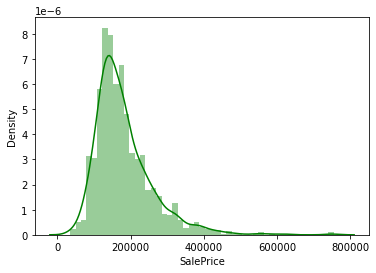

In [27]:
# Lets check target variable
plt.figure()
sns.distplot(data['SalePrice'],color='g')
plt.show()

In [28]:
# IQR to remove the outlier 

out = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
        'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']


Q1 = data[out].quantile(0.05)
Q3 = data[out].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[out] < (Q1 - 1.5 * IQR)) |(data[out] > (Q3 + 1.5 * IQR))).any(axis=1)]


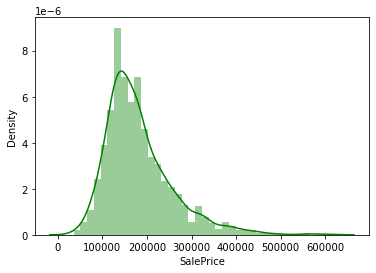

In [29]:
plt.figure()
sns.distplot(data['SalePrice'],color='g')
plt.show()

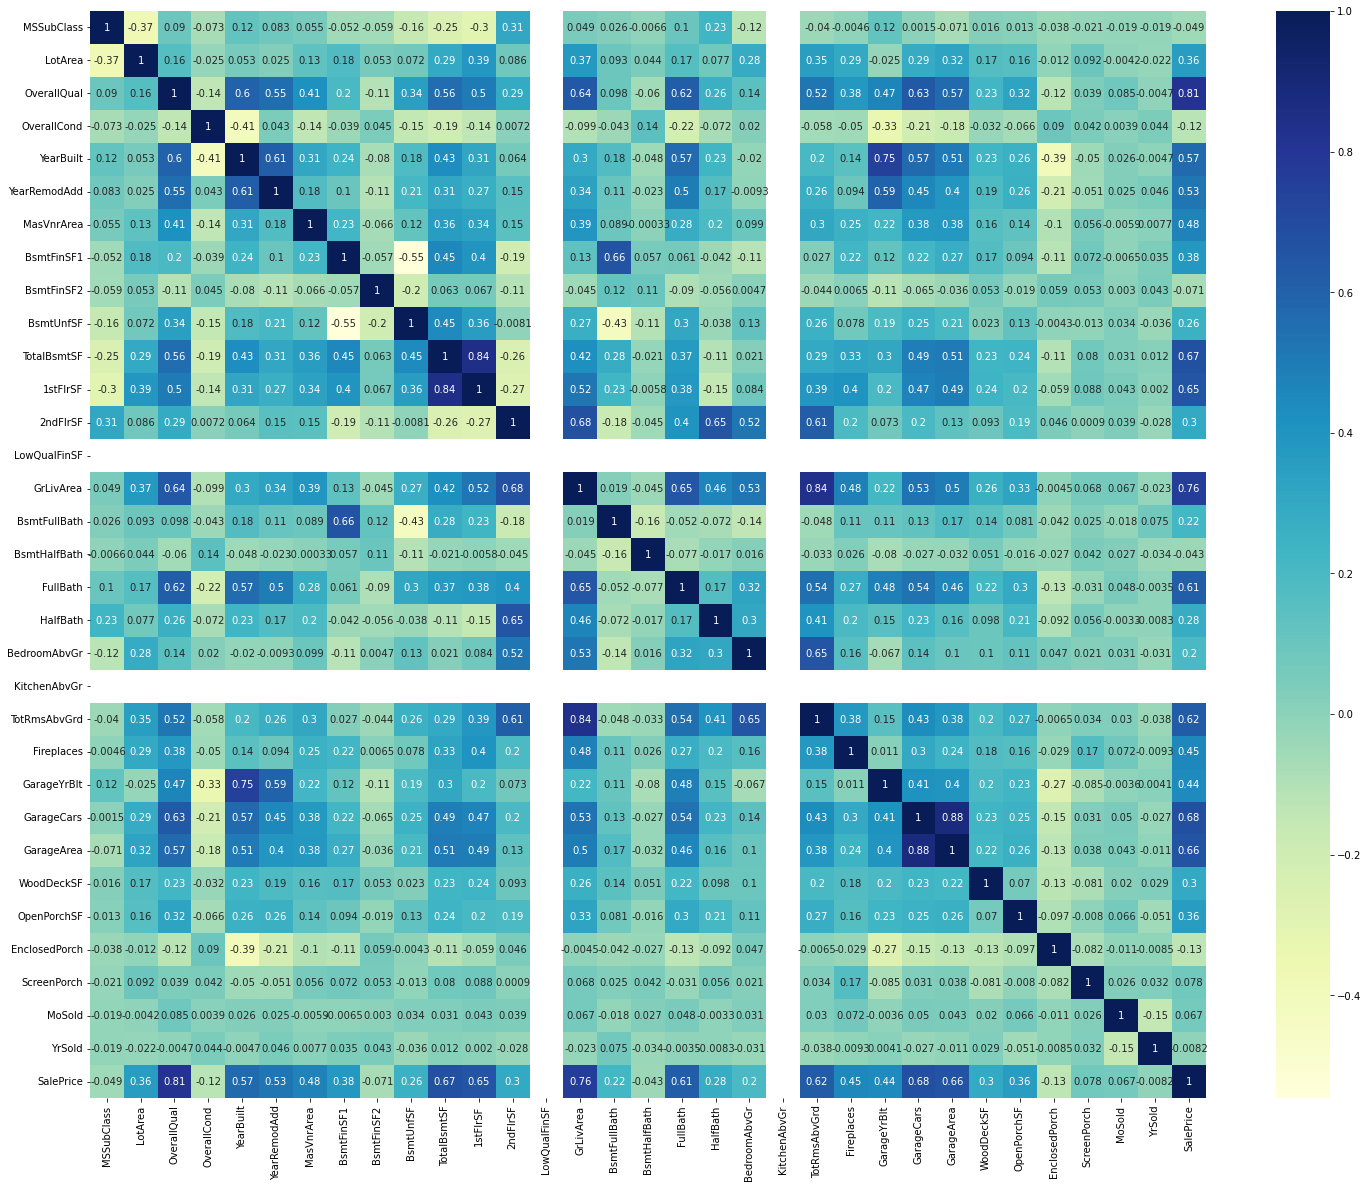

In [30]:
# Checking co-relations of variables 

plt.figure(figsize = (25, 20))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dummy Creation

In [31]:
data.shape

(1334, 71)

In [32]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [33]:
# Creating Dummy variable

data=pd.get_dummies(data,drop_first=True)
data.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 221 columns]

In [34]:
data.shape

(1334, 221)

# 4) Scalling and Train test split

In [35]:
#Split the data into train and test
y = data.pop('SalePrice')
X = data


In [36]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [37]:
X_train.shape

(933, 220)

In [38]:
X_test.shape

(401, 220)

In [39]:
y_train.shape

(933,)

In [40]:
y_test.shape

(401,)

In [41]:
# Scalling of numneric variables 

X_train.select_dtypes(include=['int64','int32','float64','float32']).columns


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [42]:
Numeric_Variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                     'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']

In [43]:
X_train.describe()

MSSubClass       LotArea  OverallQual  OverallCond    YearBuilt  \
count  933.000000    933.000000   933.000000   933.000000   933.000000   
mean    54.624866   9559.614148     6.127546     5.585209  1973.038585   
std     40.119439   4017.761046     1.308532     1.078703    29.357070   
min     20.000000   1300.000000     1.000000     2.000000  1880.000000   
25%     20.000000   7500.000000     5.000000     5.000000  1955.000000   
50%     50.000000   9430.000000     6.000000     5.000000  1976.000000   
75%     60.000000  11228.000000     7.000000     6.000000  2002.000000   
max    190.000000  36500.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  ...  \
count    933.000000   933.000000   933.000000  933.000000   933.000000  ...   
mean    1985.674169    98.176849   437.249732   39.732047   561.957128  ...   
std       20.609723   165.153264   417.893749  135.527831   424.233176  ...   
min     1950.000000     0.000000     0.000000    0.000000     0.000000  ...   
25%     1968.000000     0.000000     0.000000    0.000000   230.000000  ...   
50%     1995.000000     0.000000   400.000000    0.000000   480.000000  ...   
75%     2004.000000   161.000000   712.000000    0.000000   788.000000  ...   
max     2010.000000  1115.000000  2188.000000  972.000000  2153.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      933.000000      933.000000    933.000000    933.000000   
mean         0.002144        0.004287      0.091104      0.001072   
std          0.046274        0.065372      0.287911      0.032739   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   933.000000             933.000000            933.000000   
mean      0.861736               0.001072              0.003215   
std       0.345362               0.032739              0.056644   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            933.000000            933.000000             933.000000  
mean               0.015005              0.822079               0.092176  
std                0.121639              0.382651               0.289429  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 220 columns]

In [44]:
X_test.describe()

MSSubClass       LotArea  OverallQual  OverallCond    YearBuilt  \
count  401.000000    401.000000   401.000000   401.000000   401.000000   
mean    52.057357  10107.032419     6.169576     5.608479  1973.458853   
std     40.175480   4405.734630     1.456424     1.141853    29.084685   
min     20.000000   1477.000000     1.000000     1.000000  1875.000000   
25%     20.000000   7742.000000     5.000000     5.000000  1957.000000   
50%     50.000000   9473.000000     6.000000     5.000000  1973.000000   
75%     60.000000  12122.000000     7.000000     6.000000  2002.000000   
max    190.000000  32463.000000    10.000000     9.000000  2009.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2    BsmtUnfSF  ...  \
count    401.000000   401.000000   401.000000  401.000000   401.000000  ...   
mean    1985.807980   113.468828   456.932668   38.448878   591.296758  ...   
std       20.450196   184.495866   441.245944  135.259373   461.075036  ...   
min     1950.000000     0.000000     0.000000    0.000000     0.000000  ...   
25%     1968.000000     0.000000     0.000000    0.000000   254.000000  ...   
50%     1995.000000     0.000000   388.000000    0.000000   486.000000  ...   
75%     2004.000000   186.000000   733.000000    0.000000   858.000000  ...   
max     2010.000000  1129.000000  1904.000000  869.000000  2336.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      401.000000      401.000000    401.000000    401.000000   
mean         0.004988        0.002494      0.084788      0.002494   
std          0.070534        0.049938      0.278914      0.049938   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   401.000000             401.000000            401.000000   
mean      0.865337               0.002494              0.002494   
std       0.341790               0.049938              0.049938   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            401.000000            401.000000             401.000000  
mean               0.007481              0.832918               0.089776  
std                0.086278              0.373515               0.286217  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 220 columns]

In [45]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()
X_train[Numeric_Variables] = scaler.fit_transform(X_train[Numeric_Variables])
X_test[Numeric_Variables] = scaler.transform(X_test[Numeric_Variables])

In [46]:
X_train.describe()

MSSubClass     LotArea  OverallQual  OverallCond   YearBuilt  \
count  933.000000  933.000000   933.000000   933.000000  933.000000   
mean     0.203676    0.234648     0.569727     0.512173    0.715681   
std      0.235997    0.114141     0.145392     0.154100    0.225824   
min      0.000000    0.000000     0.000000     0.000000    0.000000   
25%      0.000000    0.176136     0.444444     0.428571    0.576923   
50%      0.176471    0.230966     0.555556     0.428571    0.738462   
75%      0.235294    0.282045     0.666667     0.571429    0.938462   
max      1.000000    1.000000     1.000000     1.000000    1.000000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    933.000000  933.000000  933.000000  933.000000  933.000000  ...   
mean       0.594569    0.088051    0.199840    0.040877    0.261011  ...   
std        0.343495    0.148120    0.190993    0.139432    0.197043  ...   
min        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%        0.300000    0.000000    0.000000    0.000000    0.106828  ...   
50%        0.750000    0.000000    0.182815    0.000000    0.222945  ...   
75%        0.900000    0.144395    0.325411    0.000000    0.366001  ...   
max        1.000000    1.000000    1.000000    1.000000    1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      933.000000      933.000000    933.000000    933.000000   
mean         0.002144        0.004287      0.091104      0.001072   
std          0.046274        0.065372      0.287911      0.032739   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   933.000000             933.000000            933.000000   
mean      0.861736               0.001072              0.003215   
std       0.345362               0.032739              0.056644   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            933.000000            933.000000             933.000000  
mean               0.015005              0.822079               0.092176  
std                0.121639              0.382651               0.289429  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 220 columns]

In [47]:
X_test.describe()

MSSubClass     LotArea  OverallQual  OverallCond   YearBuilt  \
count  401.000000  401.000000   401.000000   401.000000  401.000000   
mean     0.188573    0.250200     0.574397     0.515497    0.718914   
std      0.236326    0.125163     0.161825     0.163122    0.223728   
min      0.000000    0.005028     0.000000    -0.142857   -0.038462   
25%      0.000000    0.183011     0.444444     0.428571    0.592308   
50%      0.176471    0.232187     0.555556     0.428571    0.715385   
75%      0.235294    0.307443     0.666667     0.571429    0.938462   
max      1.000000    0.885312     1.000000     1.000000    0.992308   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count    401.000000  401.000000  401.000000  401.000000  401.000000  ...   
mean       0.596800    0.101766    0.208836    0.039556    0.274639  ...   
std        0.340837    0.165467    0.201666    0.139156    0.214155  ...   
min        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%        0.300000    0.000000    0.000000    0.000000    0.117975  ...   
50%        0.750000    0.000000    0.177331    0.000000    0.225732  ...   
75%        0.900000    0.166816    0.335009    0.000000    0.398514  ...   
max        1.000000    1.012556    0.870201    0.894033    1.084998  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      401.000000      401.000000    401.000000    401.000000   
mean         0.004988        0.002494      0.084788      0.002494   
std          0.070534        0.049938      0.278914      0.049938   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   401.000000             401.000000            401.000000   
mean      0.865337               0.002494              0.002494   
std       0.341790               0.049938              0.049938   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            401.000000            401.000000             401.000000  
mean               0.007481              0.832918               0.089776  
std                0.086278              0.373515               0.286217  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 220 columns]

In [48]:
y_train.describe()

count       933.000000
mean     179126.512326
std       73447.241318
min       37900.000000
25%      131000.000000
50%      164000.000000
75%      210000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [49]:
y_test.describe()

count       401.000000
mean     186182.625935
std       79158.957616
min       35311.000000
25%      131500.000000
50%      171900.000000
75%      228000.000000
max      501837.000000
Name: SalePrice, dtype: float64

# 5) Model building (Linear regrassion, Lasso and ridge regrasssion)

1) Linear regression <br/>
2) Ridge regresssion <br/>
3) Lasso regresssion


## 1) Linear regression

In [50]:
# we have 220 variables so we need to do combine approch

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [52]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 143),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 126),
 ('MasVnrArea', False, 63),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', False, 26),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 33),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 172),
 ('BsmtHalfBath', False, 131),
 ('FullBath', False, 80),
 ('HalfBath', False, 159),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 38),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 127),
 ('GarageYrBlt', False, 111),
 ('GarageCars', False, 2),
 ('GarageArea', False, 114),
 ('WoodDeckSF', False, 165),
 ('OpenPorchSF', False, 90),
 ('EnclosedPorch', False, 124),
 ('ScreenPorch', False, 88),
 ('MoSold', False, 169),
 ('YrSold', False, 181),
 ('MSZoning_FV', False, 3),
 ('MSZoning_RH', False, 5),
 ('MSZoning_RL', False, 4),
 ('MSZoning_RM', False, 6),
 (

In [53]:
# List of final 20 varables for model building

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Condition1_PosA', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'Heating_OthW', 'Functional_Sev',
       'SaleType_Con', 'SaleType_ConLI'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [55]:
lm1=lm.fit(X_train, y_train)

In [56]:
# Checking the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-109066.48767416936
[-1.56067524e+04  4.06457980e+04  5.22831648e+04  4.16335862e+04
  2.74964246e+04  4.56888548e+03  1.65288469e+04 -1.24344959e+16
 -5.52391681e+15 -1.22355894e+16  1.82198326e+16  1.51031139e+16
  8.40743489e+15 -2.88701605e+16 -1.51031139e+16  2.34943750e+03
 -3.70503125e+03  1.63293125e+04  3.78868750e+03 -2.33746250e+04
  4.75215824e+15  2.16703750e+04  3.85835938e+03  6.26742969e+03
  2.47575625e+04  7.56284375e+03  3.25862500e+03  9.54712500e+03
  5.97056250e+03  1.21658750e+04 -2.83290625e+03 -1.77900684e+03
  6.43894375e+04  5.05564375e+04  4.62981875e+04  4.27265312e+04
  2.04889219e+04 -1.17181250e+03 -1.10473438e+03  8.16500000e+02
  4.03406250e+03 -1.12885625e+04  8.57941406e+02  4.33831350e+15
  5.25500000e+03 -4.61487500e+03 -1.81306367e+04  2.92500000e+02
 -2.36937500e+02 -1.56385625e+04 -1.99537500e+03 -2.01468750e+03
 -1.13997500e+04 -1.34553125e+04 -1.60435000e+04  6.18875000e+03
 -2.49412500e+04 -2.03925000e+04 -1.91866250e+04 -7.71615625e+03
 -2.3

In [57]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.metrics import r2_score, mean_squared_error
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8783786226258353
0.8864844077365696
611472325967.6838
284521863241.68567
655382986.0318155
709530831.0266476


## 2) Ridge regresssion

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-15189.932728825492


In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.013659      0.005923         0.002889        0.003420      0.0001   
1        0.009490      0.003866         0.006773        0.003396       0.001   
2        0.012292      0.003223         0.001800        0.003128        0.01   
3        0.012050      0.004010         0.003212        0.003934        0.05   
4        0.012036      0.004443         0.006703        0.002897         0.1   
5        0.013752      0.003136         0.003196        0.003915         0.2   
6        0.011428      0.003783         0.005644        0.004388         0.3   
7        0.013347      0.004211         0.004000        0.003438         0.4   
8        0.010864      0.004366         0.005468        0.003082         0.5   
9        0.010957      0.004789         0.007480        0.004109         0.6   
10       0.012168      0.003447         0.004993        0.004091         0.7   
11       0.011319      0.003697         0.005455        0.004538         0.8   
12       0.011494      0.003948         0.004380        0.003776         0.9   
13       0.009527      0.003992         0.006570        0.003294         1.0   
14       0.011272      0.003878         0.006769        0.002687         2.0   
15       0.011202      0.003919         0.006396        0.003198         3.0   
16       0.012102      0.004202         0.005314        0.003582         4.0   
17       0.015553      0.001110         0.001448        0.002055         5.0   
18       0.012919      0.004290         0.003226        0.003951         6.0   
19       0.012899      0.005171         0.005230        0.003890         7.0   
20       0.011227      0.003949         0.007021        0.003673         8.0   
21       0.012612      0.003554         0.003399        0.003776         9.0   
22       0.011409      0.003492         0.004783        0.002883        10.0   
23       0.009756      0.002260         0.005716        0.003510          20   
24       0.011017      0.002634         0.006631        0.003672          50   
25       0.008184      0.001955         0.009091        0.001381         100   
26       0.013355      0.004050         0.004887        0.003994         500   
27       0.016745      0.000499         0.001582        0.003163        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -16385.592831      -17197.305439   
1    {'alpha': 0.001}      -16381.521172      -17184.985736   
2     {'alpha': 0.01}      -16345.730439      -17076.134847   
3     {'alpha': 0.05}      -16212.614782      -16766.445009   
4      {'alpha': 0.1}      -16101.044981      -16544.952976   
5      {'alpha': 0.2}      -15984.940827      -16322.386654   
6      {'alpha': 0.3}      -15866.900997      -16212.879182   
7      {'alpha': 0.4}      -15754.709066      -16169.786820   
8      {'alpha': 0.5}      -15658.790520      -16136.981889   
9      {'alpha': 0.6}      -15572.914322      -16107.905991   
10     {'alpha': 0.7}      -15501.228619      -16085.090683   
11     {'alpha': 0.8}      -15437.546269      -16062.469825   
12     {'alpha': 0.9}      -15378.913557      -16042.375420   
13     {'alpha': 1.0}      -15323.998792      -16028.658504   
14     {'alpha': 2.0}      -14979.884666      -15885.828255   
15     {'alpha': 3.0}      -14900.300751      -15835.546236   
16     {'alpha': 4.0}      -14890.622651      -15804.227643   
17     {'alpha': 5.0}      -14935.872019      -15809.446199   
18     {'alpha': 6.0}      -14980.021808      -15841.775320   
19     {'alpha': 7.0}      -15022.418164      -15885.515623   
20     {'alpha': 8.0}      -15094.358520      -15946.047770   
21     {'alpha': 9.0}      -15186.904197      -16013.171481   
22    {'alpha': 10.0}      -15283.044989      -16083.245576   
23      {'alpha': 20}      -16435.442020      -16673.499928   
24      {'alpha': 50}      -18846.520063      -18312.215381   
25     {'alpha': 100}      -21389.878312     

In [61]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.28349211e+04,  2.33981638e+04,  4.33634903e+04,  2.56932568e+04,
        1.36387302e+04,  8.11873623e+03,  1.96921354e+04,  3.92323010e+04,
        5.44454663e+03,  1.50956321e+04,  3.85630910e+04,  4.25529444e+04,
        2.58037917e+04,  0.00000000e+00,  5.69171145e+04,  4.60110274e+03,
       -3.94434511e+03,  1.70378099e+04,  7.28908162e+03, -7.28072678e+03,
        0.00000000e+00,  3.02986496e+04,  1.11144231e+04,  3.21754799e+03,
        1.99203196e+04,  1.62108069e+04,  4.63544131e+03,  8.95298845e+03,
        3.54331578e+03,  8.66467632e+03, -1.99140329e+03, -1.94200742e+02,
        1.41816991e+04,  4.19454680e+03,  6.11117041e+03,  6.10639644e+02,
        1.48313287e+04, -5.84807560e+02, -2.19949231e+02, -5.97433779e+02,
        5.59718427e+03, -3.73803957e+03,  8.34742688e+02,  0.00000000e+00,
        4.82043865e+03, -4.26774516e+03, -5.94890112e+03, -4.87900068e+02,
       -3.35926152e+02, -3.92774739e+03,  1.18456431e+03,  3.01346987e+03,
        2.00526592e+03,  

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9358663022556272
0.9141470428285277
322443160728.34143
215186679223.3197
345598243.01001227
536625135.22024864


## 3) Lasso regresssion

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.137348      0.012614         0.005693        0.003583      0.0001   
1        0.128461      0.012625         0.005651        0.003440       0.001   
2        0.145072      0.010601         0.003223        0.003989        0.01   
3        0.136198      0.012899         0.006961        0.003566        0.05   
4        0.141664      0.014713         0.004567        0.003753         0.1   
5        0.144709      0.011843         0.001824        0.003402         0.2   
6        0.139978      0.017947         0.005055        0.004134         0.3   
7        0.140567      0.006698         0.006838        0.003184         0.4   
8        0.137491      0.008592         0.004813        0.003930         0.5   
9        0.130804      0.004322         0.005336        0.004176         0.6   
10       0.133993      0.007576         0.006342        0.003226         0.7   
11       0.137962      0.014843         0.004714        0.003951         0.8   
12       0.138478      0.007012         0.005845        0.002716         0.9   
13       0.132597      0.011001         0.008247        0.000449         1.0   
14       0.140981      0.004462         0.002630        0.003203         2.0   
15       0.134155      0.005316         0.006398        0.003199         3.0   
16       0.128154      0.008770         0.004902        0.003803         4.0   
17       0.105469      0.009724         0.002207        0.002715         5.0   
18       0.119335      0.006953         0.005612        0.004652         6.0   
19       0.124388      0.014379         0.001598        0.003197         7.0   
20       0.100335      0.017681         0.003222        0.003946         8.0   
21       0.097702      0.014732         0.008123        0.000205         9.0   
22       0.090027      0.010210         0.001599        0.003199        10.0   
23       0.050795      0.006083         0.006986        0.003539          20   
24       0.028029      0.004125         0.006558        0.002785          50   
25       0.020913      0.004020         0.006393        0.003196         100   
26       0.016381      0.000452         0.006309        0.003255         500   
27       0.013146      0.004279         0.005217        0.004279        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -16402.912113      -17174.550770   
1    {'alpha': 0.001}      -16402.836424      -17174.326820   
2     {'alpha': 0.01}      -16402.069437      -17172.109134   
3     {'alpha': 0.05}      -16398.611723      -17162.175844   
4      {'alpha': 0.1}      -16394.264130      -17149.538676   
5      {'alpha': 0.2}      -16385.524556      -17126.044676   
6      {'alpha': 0.3}      -16376.568219      -17102.906285   
7      {'alpha': 0.4}      -16366.537825      -17079.637338   
8      {'alpha': 0.5}      -16357.078077      -17057.415720   
9      {'alpha': 0.6}      -16347.562415      -17036.111175   
10     {'alpha': 0.7}      -16337.825406      -17014.938822   
11     {'alpha': 0.8}      -16328.041804      -16992.464517   
12     {'alpha': 0.9}      -16318.445521      -16969.969440   
13     {'alpha': 1.0}      -16306.162786      -16948.389578   
14     {'alpha': 2.0}      -16207.675817      -16756.906064   
15     {'alpha': 3.0}      -16123.013007      -16574.760642   
16     {'alpha': 4.0}      -16063.876971      -16399.640188   
17     {'alpha': 5.0}      -16079.433770      -16359.985096   
18     {'alpha': 6.0}      -16077.075116      -16360.144936   
19     {'alpha': 7.0}      -16062.511779      -16373.408799   
20     {'alpha': 8.0}      -16021.694537      -16382.974528   
21     {'alpha': 9.0}      -15982.026007      -16377.714839   
22    {'alpha': 10.0}      -15947.469372      -16384.258540   
23      {'alpha': 20}      -15559.076660      -16303.182143   
24      {'alpha': 50}      -14750.391818      -16195.070247   
25     {'alpha': 100}      -14310.125582     

In [65]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-15047.461011607787


In [66]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [67]:
lasso.coef_

array([-1.34098454e+04,  2.03006473e+04,  6.08291750e+04,  2.83500567e+04,
        2.36265492e+04,  7.49611385e+03,  1.46682736e+04,  3.20890075e+04,
        0.00000000e+00,  0.00000000e+00,  5.31832363e+04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.48675137e+05,  2.81411616e+03,
       -0.00000000e+00,  1.33865532e+03,  3.99865820e+02, -3.20789189e+03,
        0.00000000e+00,  1.66030941e+04,  7.09110806e+03,  4.24577472e+03,
        2.55200381e+04,  5.90331392e+03,  4.70382553e+02,  5.35950107e+03,
        0.00000000e+00,  5.66823234e+03, -4.07268332e+01,  0.00000000e+00,
        1.36570198e+04,  0.00000000e+00,  4.55771576e+03, -1.45195755e+03,
        8.49198780e+03,  0.00000000e+00, -0.00000000e+00, -3.89634184e+02,
        5.02933367e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.00338707e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.39737146e+03,  

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.930581506872286
0.9189712439899873
349013375562.969
203095030175.44336
374076501.13930225
506471396.9462428


In [69]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.783786e-01      9.358663e-01      9.305815e-01
1   R2 Score (Test)       8.864844e-01      9.141470e-01      9.189712e-01
2       RSS (Train)       6.114723e+11      3.224432e+11      3.490134e+11
3        RSS (Test)       2.845219e+11      2.151867e+11      2.030950e+11
4       MSE (Train)       2.560045e+04      1.859027e+04      1.934106e+04
5        MSE (Test)       2.663702e+04      2.316517e+04      2.250492e+04

# 6) Model evalution

In [90]:
Lm_pred = rfe.predict(X_test)

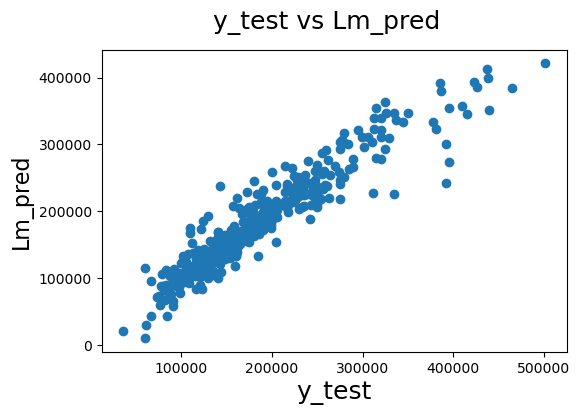

In [91]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,Lm_pred)
fig.suptitle('y_test vs Lm_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('Lm_pred', fontsize=16)  
plt.show()

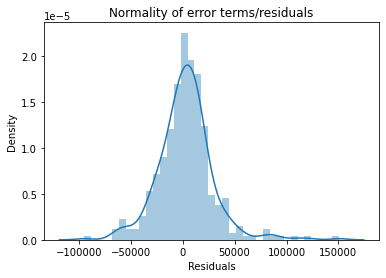

In [92]:
y_lm =y_test-Lm_pred
# Distribution of errors
sns.distplot(y_lm,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [71]:
ridge_pred = ridge.predict(X_test)

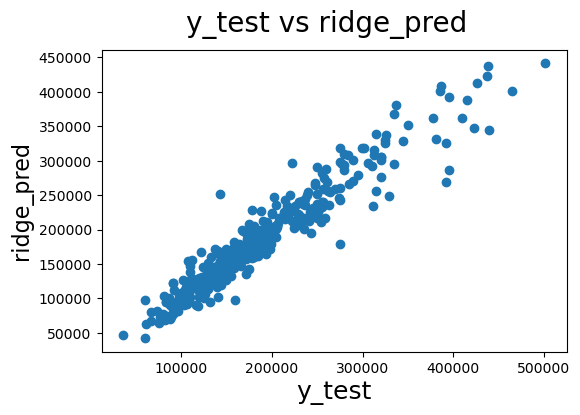

In [72]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

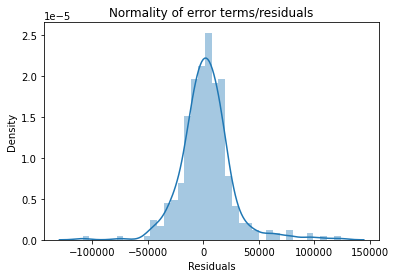

In [73]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [74]:
lasso_pred = lasso.predict(X_test)

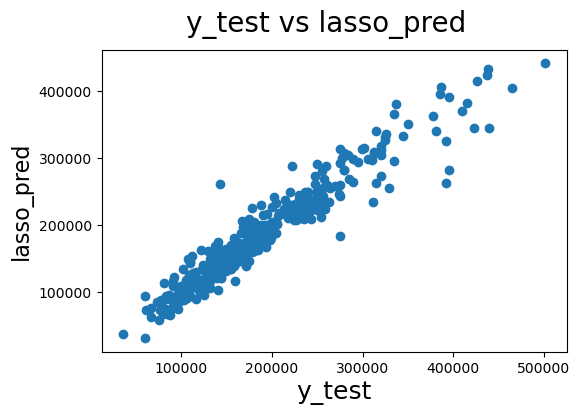

In [75]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

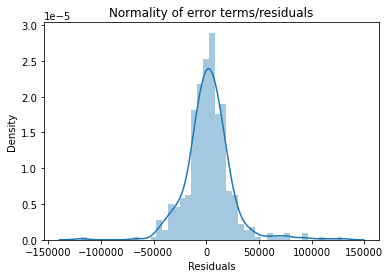

In [76]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [77]:
betas = pd.DataFrame(index=X_train.columns)


In [78]:
betas.rows = X_train.columns

In [79]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [80]:
pd.set_option('display.max_rows', None)
betas.head(100)

Ridge          Lasso
MSSubClass           -12834.921067  -13409.845389
LotArea               23398.163773   20300.647276
OverallQual           43363.490324   60829.174997
OverallCond           25693.256758   28350.056750
YearBuilt             13638.730249   23626.549166
YearRemodAdd           8118.736230    7496.113845
MasVnrArea            19692.135399   14668.273646
BsmtFinSF1            39232.301012   32089.007545
BsmtFinSF2             5444.546627       0.000000
BsmtUnfSF             15095.632114       0.000000
TotalBsmtSF           38563.091041   53183.236344
1stFlrSF              42552.944377       0.000000
2ndFlrSF              25803.791715       0.000000
LowQualFinSF              0.000000       0.000000
GrLivArea             56917.114540  148675.136607
BsmtFullBath           4601.102739    2814.116163
BsmtHalfBath          -3944.345113      -0.000000
FullBath              17037.809922    1338.655322
HalfBath               7289.081619     399.865820
BedroomAbvGr          -7280.726781   -3207.891893
KitchenAbvGr              0.000000       0.000000
TotRmsAbvGrd          30298.649572   16603.094115
Fireplaces            11114.423129    7091.108065
GarageYrBlt            3217.547995    4245.774715
GarageCars            19920.319569   25520.038102
GarageArea            16210.806901    5903.313922
WoodDeckSF             4635.441313     470.382553
OpenPorchSF            8952.988450    5359.501071
EnclosedPorch          3543.315781       0.000000
ScreenPorch            8664.676318    5668.232339
MoSold                -1991.403294     -40.726833
YrSold                 -194.200742       0.000000
MSZoning_FV           14181.699051   13657.019790
MSZoning_RH            4194.546804       0.000000
MSZoning_RL            6111.170412    4557.715762
MSZoning_RM             610.639644   -1451.957554
Street_Pave           14831.328662    8491.987803
LotShape_IR2           -584.807560       0.000000
LotShape_IR3           -219.949231      -0.000000
LotShape_Reg           -597.433779    -389.634184
LandContour_HLS        5597.184274     502.933367
LandContour_Low       -3738.039567      -0.000000
LandContour_Lvl         834.742688       0.000000
Utilities_NoSeWa          0.000000       0.000000
LotConfig_CulDSac      4820.438654    4003.387066
LotConfig_FR2         -4267.745160      -0.000000
LotConfig_FR3         -5948.901116      -0.000000
LotConfig_Inside       -487.900068      -0.000000
LandSlope_Mod          -335.926152      -0.000000
LandSlope_Sev         -3927.747385      -0.000000
Neighborhood_Blueste   1184.564315       0.000000
Neighborhood_BrDale    3013.469873       0.000000
Neighborhood_BrkSide   2005.265923    3397.371460
Neighborhood_ClearCr   1644.414857       0.000000
Neighborhood_CollgCr  -6599.263947    -103.496471
Neighborhood_Crawfor  16818.490910   17189.912700
Neighborhood_Edwards -12741.663902   -6184.550238
Neighborhood_Gilbert -12012.933833   -3409.069855
Neighborhood_IDOTRR   -8273.349443   -1284.965535
Neighborhood_MeadowV  -6944.803937      -0.000000
Neighborhood_Mitchel -11825.647058   -6734.226824
Neighborhood_NAmes    -9928.662918   -4971.234036
Neighborhood_NPkVill   4172.645014       0.000000
Neighborhood_NWAmes   -8087.810124   -3088.566879
Neighborhood_NoRidge  27390.729563   27768.237265
Neighborhood_NridgHt  15700.062820   17385.863751
Neighborhood_OldTown  -9064.779069   -5129.497760
Neighborhood_SWISU   -13906.036047   -5820.757331
Neighborhood_Sawyer   -3480.767665       0.000000
Neighborhood_SawyerW  -1254.003436       0.000000
Neighborhood_Somerst  -3013.168659       0.000000
Neighborhood_StoneBr  29508.656350   31141.835100
Neighborhood_Timber   -7292.437984      -0.000000
Neighborhood_Veenker   4173.057423       0.000000
Condition1_Feedr       -441.939743      -0.000000
Condition1_Norm       10453.065073    9645.048932
Condition1_PosA       -5272.981804      -0.000000
Condition1_PosN        8671.017662    1405.109112
Condition1_RRAe      -11150.546534   -1471.165923
Condition1_RRAn        3380.8

# 7) Conclusion 

Now we can able to answer the following:

1) Which variables are significant in predicting the price of a house


2) How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Which variables are significant in predicting the price of a house

The following variables are very important to predict the price of house

1) LotArea: Lot size in square feet <br/>
2) OverallQual: Rates the overall material and finish of the house <br/>
3) OverallCond: Rates the overall condition of the house <br/>
4) BsmtFinSF1: Type 1 finished square feet <br/>
5) TotalBsmtSF: Total square feet of basement area <br/>
6) YearBuilt: Original construction date <br/>
7) GrLivArea: Above grade (ground) living area square feet <br/>
8) Neighborhood: Physical locations within Ames city limits (Northridge) <br/>
9) TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br/>
10) GarageCars: Size of garage in car capacity <br/>
11) Neighborhood: Physical locations within Ames city limits (Stone Brook) <br/>
12) ScreenPorch: Screen porch area in square feet

# How well those variables describe the price of a house.

The Value of R2 score in ridge regrassion in train data is 0.9358 and in test data is 0.9141. <br/>
The Value of R2 score in lasso regrassion in train data is 0.9305 and in test data is 0.9189. <br/>
so the variation between train data and test data is very less, hence model is good and all variables are well describing the price of house.



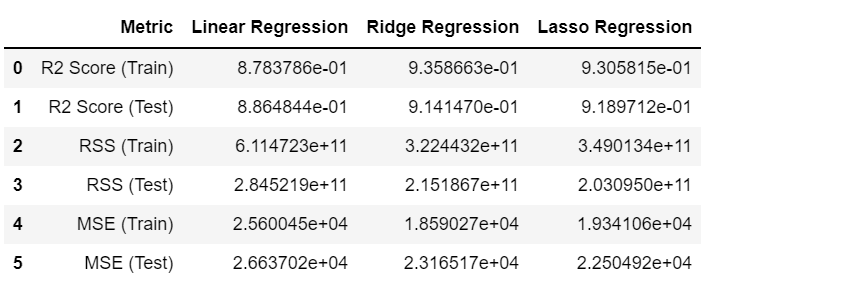


# Determine the optimal value of lambda for ridge and lasso regression.

1) Optimal value of lambda for ridge regression is 4 <br/>
2) Optimal value of lambda for lasso regression is 100

# Problem Statement - Part II

###  Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

1) Optimal value of lambda for ridge regression is 4 <br/>
2) Optimal value of lambda for lasso regression is 100

Lets double it


In [81]:
#Change the alpha value from 4 to 8
alpha = 8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=8)

In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9296110699466322
0.9101725612771074
353892413581.99194
225148543262.2751
379305909.51981986
561467688.9333544


On increasing value of alpha from 4 to 10, <br/>In ridge the R2 score on train and test both is decresed.

In [83]:
#Changed alpha 100 to 200
alpha =200
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train, y_train) 

Lasso(alpha=200)

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train)
y_pred_test = lasso20.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9216635864697275
0.9163019000113137
393849749308.1122
209785624016.35556
422132635.9143753
523156169.6168468


On increasing value of alpha from 4 to 10, <br/>
In ridge the R2 score on train and test both is decresed.

In [85]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(10)

Ridge2         Ridge         Lasso       Lasso20
MSSubClass   -12656.245105 -12834.921067 -13409.845389 -14816.413469
LotArea       19451.983104  23398.163773  20300.647276  12081.856149
OverallQual   38068.057962  43363.490324  60829.174997  65844.696639
OverallCond   19629.402665  25693.256758  28350.056750  19419.584064
YearBuilt     10557.753862  13638.730249  23626.549166  20313.937776
YearRemodAdd   9480.659963   8118.736230   7496.113845   9268.263619
MasVnrArea    19376.446439  19692.135399  14668.273646   9431.188173
BsmtFinSF1    33635.621608  39232.301012  32089.007545  33195.376015
BsmtFinSF2     3189.033280   5444.546627      0.000000      0.000000
BsmtUnfSF     14954.039046  15095.632114      0.000000      0.000000

As in both ridge and lasso the value of R2 score decreased, Also in variables the value of coefficients are decreased.

### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment.<br/>
Now, which one will you choose to apply and why?

As we can see the value of R2 score of Ridge on both train and test data is more than the Lasso regration. <br/>
Hence for this problem Ridge regrassion will be good over the lasso regrassion.

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The top 5 variables in the present model are 
1) LotArea: Lot size in square feet <br/>
2) OverallQual: Rates the overall material and finish of the house <br/>
3) OverallCond: Rates the overall condition of the house <br/>
4) BsmtFinSF1: Type 1 finished square feet <br/>
5) TotalBsmtSF: Total square feet of basement area <br/>

In [86]:
# Lets remove top 5 variables and see the model

X_train2 = X_train.drop(['LotArea','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test.drop(['LotArea','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [87]:
# Creating Lasso model 

alpha =100
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

Lasso(alpha=100)

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9207974148198704
0.9055293977319931
398204575777.44214
236786429449.09955
426800188.40025955
590489849.0002482


In [93]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(50)

Lasso21
MSSubClass            -17087.320256
YearBuilt              18259.060340
YearRemodAdd           10681.862752
MasVnrArea             18987.489644
BsmtFinSF2                -0.000000
BsmtUnfSF                  0.000000
1stFlrSF               44510.511759
2ndFlrSF                   0.000000
LowQualFinSF               0.000000
GrLivArea             167474.714640
BsmtFullBath            9722.037592
BsmtHalfBath               0.000000
FullBath                   0.000000
HalfBath                   0.000000
BedroomAbvGr           -4569.277300
KitchenAbvGr               0.000000
TotRmsAbvGrd           12148.788445
Fireplaces              9320.586809
GarageYrBlt                0.000000
GarageCars             25987.867170
GarageArea             10491.900737
WoodDeckSF              3532.444115
OpenPorchSF             7289.165174
EnclosedPorch              0.000000
ScreenPorch             6185.823564
MoSold                    -0.000000
YrSold                     0.000000
MSZoning_FV            15597.040508
MSZoning_RH                0.000000
MSZoning_RL             4765.217750
MSZoning_RM             -117.614121
Street_Pave             5201.595221
LotShape_IR2               0.000000
LotShape_IR3               0.000000
LotShape_Reg            -392.034604
LandContour_HLS         3366.684647
LandContour_Low           -0.000000
LandContour_Lvl            0.000000
Utilities_NoSeWa           0.000000
LotConfig_CulDSac       6145.631627
LotConfig_FR2             -0.000000
LotConfig_FR3             -0.000000
LotConfig_Inside          -0.000000
LandSlope_Mod             -0.000000
LandSlope_Sev             -0.000000
Neighborhood_Blueste       0.000000
Neighborhood_BrDale        0.000000
Neighborhood_BrkSide    2649.170374
Neighborhood_ClearCr       0.000000
Neighborhood_CollgCr    -252.877856

Now the most important variables are 

1) GrLivArea: Above grade (ground) living area square feet <br/>
2) 1stFlrSF: First Floor square feet <br/>
3) YearBuilt: Original construction date <br/>
4) MasVnrArea: Masonry veneer area in square feet <br/>
5) LotConfig: Lot configuration <br/>
6) ScreenPorch: Screen porch area in square feet <br/>
7) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

As, 
The Value of R2 score in ridge regrassion in train data is 0.9358, test data is 0.9141 and perecent difference is 2.32% <br/> 
The Value of R2 score in lasso regrassion in train data is 0.9305, test data is 0.9189 and perecent difference is 1.25% <br/> 
Hence model is robust and generalisable becuase it is performing good in both train and test data. <br/> 
The percentage difference between the train data and test data for both model is less than 5% so the accuracy of model is also good. 
